## import

In [2]:
import pandas as pd
import random
import os
import numpy as np

from sklearn import tree # 의사결정트리
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

#sklearn 모델의 동일한 결과 출력을 위해 선언합니다.
np.random.seed(42)

## load data

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)

In [5]:
train_df

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TRAIN_000,0,0,0,2,G G,A G,A A,G A,C A,...,A A,G G,A A,G G,A G,A A,A A,A A,A A,B
1,TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,...,A A,G A,A A,A G,A A,G A,G G,A A,A A,C
2,TRAIN_002,0,0,0,2,G G,G G,A A,G A,C C,...,A A,G A,G A,A G,A A,A A,A A,A A,A A,B
3,TRAIN_003,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G G,A G,G G,G G,G G,A A,G G,A
4,TRAIN_004,0,0,0,2,G G,G G,C C,A A,C C,...,A A,A A,A A,G G,A A,A A,A G,A A,G A,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,TRAIN_257,0,0,0,2,A G,A G,A A,G A,C C,...,A A,G A,A A,G G,A G,G A,A A,A A,A A,B
258,TRAIN_258,0,0,0,2,G G,A A,C A,A A,A A,...,G A,G A,A A,A G,A G,A A,A G,A A,G A,C
259,TRAIN_259,0,0,0,1,A G,G G,A A,G A,A A,...,G G,G A,G A,A A,G G,G G,G G,C A,G G,A
260,TRAIN_260,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G A,A G,A G,G A,G G,C A,G G,A


In [6]:
train_df['class'].value_counts()

B    114
C     79
A     69
Name: class, dtype: int64

## EDA

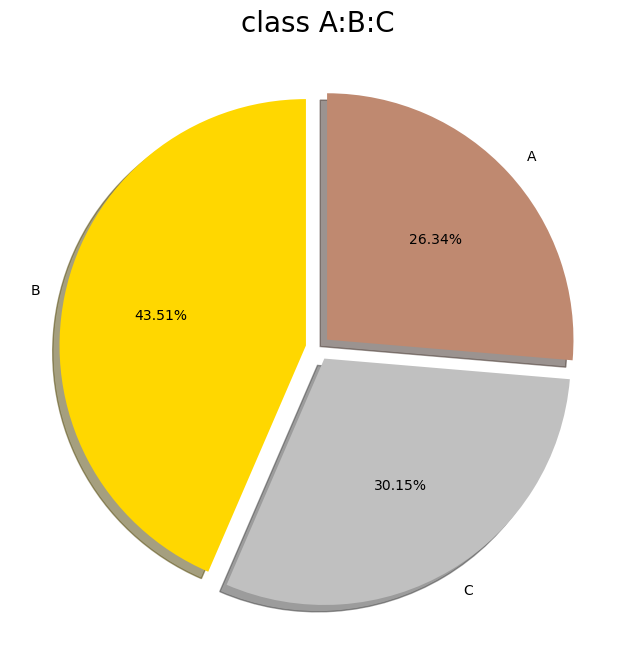

In [36]:
color = 'gold','silver','#bf8970'
plt.subplots(figsize = (8,8))
plt.pie(train_df['class'].value_counts(), labels = train_df['class'].value_counts().index, 
        autopct="%.2f%%", shadow = True, startangle = 90, explode= [0.05, 0.05, 0.05], colors= color)

plt.title('class A:B:C', size=20)
plt.show()

In [14]:
# 등급에 따른 차이를 보기 위한 데이터 분류
train_A = train_df[train_df['class']== 'A']
train_B = train_df[train_df['class']== 'B']
train_C = train_df[train_df['class']== 'C']

# class 별 정리
# Categorical 그래프 함수 정의
def cat_plot(column):

  f, ax = plt.subplots(1, 3, figsize=(16, 6))


  sns.countplot(x = column,
                hue = column,
                data = train_A,
                ax = ax[0],
                order = train_A[column].value_counts().index)
  ax[0].tick_params(labelsize=12)
  ax[0].set_title('class = A')
  ax[0].set_ylabel('count')
  ax[0].tick_params(rotation=50)


  sns.countplot(x = column,
                hue = column,
                data = train_B,
                ax = ax[1],
                order = train_B[column].value_counts().index)
  ax[1].tick_params(labelsize=12)
  ax[1].set_title('class = B')
  ax[1].set_ylabel('count')
  ax[1].tick_params(rotation=50)

  sns.countplot(x = column,
                hue = column,
                data = train_C,
                ax = ax[2],
                order = train_C[column].value_counts().index)
  ax[2].tick_params(labelsize=12)
  ax[2].set_title('class = C')
  ax[2].set_ylabel('count')
  ax[2].tick_params(rotation=50)
  plt.subplots_adjust(wspace=0.3, hspace=0.3)
  plt.show()

In [10]:
train_A

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
3,TRAIN_003,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G G,A G,G G,G G,G G,A A,G G,A
15,TRAIN_015,0,0,0,1,A A,G G,A A,G G,A A,...,G G,A A,G G,A G,A G,G A,G G,C C,G G,A
16,TRAIN_016,0,0,0,1,A A,G G,A A,G G,A A,...,G G,A A,G A,G G,A G,G G,G G,C A,G G,A
17,TRAIN_017,0,0,0,1,A G,A G,A A,G G,C A,...,G A,A A,G A,A G,G G,G A,G G,A A,G G,A
18,TRAIN_018,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G A,A A,G G,G G,G G,C A,G G,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,TRAIN_248,0,0,0,1,A G,G G,A A,G G,A A,...,G G,A A,G G,A G,G G,G G,G G,C A,G A,A
250,TRAIN_250,0,0,0,1,A G,G G,A A,G G,A A,...,G G,A A,G G,A A,G G,G G,G G,A A,G A,A
253,TRAIN_253,0,0,0,1,A A,G G,A A,G G,A A,...,G G,G A,G A,A A,G G,A A,G G,A A,G G,A
259,TRAIN_259,0,0,0,1,A G,G G,A A,G A,A A,...,G G,G A,G A,A A,G G,G G,G G,C A,G G,A


In [11]:
train_B

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TRAIN_000,0,0,0,2,G G,A G,A A,G A,C A,...,A A,G G,A A,G G,A G,A A,A A,A A,A A,B
2,TRAIN_002,0,0,0,2,G G,G G,A A,G A,C C,...,A A,G A,G A,A G,A A,A A,A A,A A,A A,B
5,TRAIN_005,0,0,0,2,G G,G G,C A,A A,C C,...,A A,G A,A A,G G,A A,A A,A A,A A,A A,B
6,TRAIN_006,0,0,0,2,G G,A G,C A,G A,A A,...,A A,G G,A A,G G,A G,A A,A G,A A,A A,B
7,TRAIN_007,0,0,0,2,G G,G G,C C,G A,C C,...,G A,G A,A A,G G,A A,G A,A A,A A,G G,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,TRAIN_254,0,0,0,2,A G,A G,C A,A A,C A,...,A A,G G,A A,G G,A G,G A,A G,A A,A A,B
255,TRAIN_255,0,0,0,2,A G,G G,C A,G A,C C,...,G A,G G,A A,G G,G G,A A,A A,A A,G A,B
256,TRAIN_256,0,0,0,2,G G,G G,C A,G A,C C,...,A A,G G,A A,G G,A G,G A,A A,A A,A A,B
257,TRAIN_257,0,0,0,2,A G,A G,A A,G A,C C,...,A A,G A,A A,G G,A G,G A,A A,A A,A A,B


In [12]:
train_C

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
1,TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,...,A A,G A,A A,A G,A A,G A,G G,A A,A A,C
4,TRAIN_004,0,0,0,2,G G,G G,C C,A A,C C,...,A A,A A,A A,G G,A A,A A,A G,A A,G A,C
9,TRAIN_009,0,0,0,2,G G,G G,C A,A A,C C,...,A A,G G,A A,A G,A G,A A,G G,A A,G G,C
12,TRAIN_012,0,0,0,2,G G,A G,C C,A A,A A,...,A A,G A,A A,G G,A A,A A,A G,A A,G G,C
13,TRAIN_013,0,0,0,2,A G,A A,C A,G A,A A,...,A A,A A,A A,A A,A A,A A,A G,A A,A A,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,TRAIN_238,0,0,0,2,A G,A G,C C,A A,A A,...,A A,G A,A A,A G,A A,A A,A G,A A,A A,C
241,TRAIN_241,0,0,0,2,A G,A G,A A,A A,A A,...,G A,G A,A A,A G,A G,A A,G G,A A,G A,C
242,TRAIN_242,0,0,0,2,G G,A G,C A,A A,C A,...,A A,G A,A A,A G,A A,A A,G G,A A,G G,C
251,TRAIN_251,0,0,0,2,G G,A A,C C,A A,A A,...,A A,G G,A A,G G,A G,G A,G G,A A,G A,C


## class와 각 SNP별 상관관계

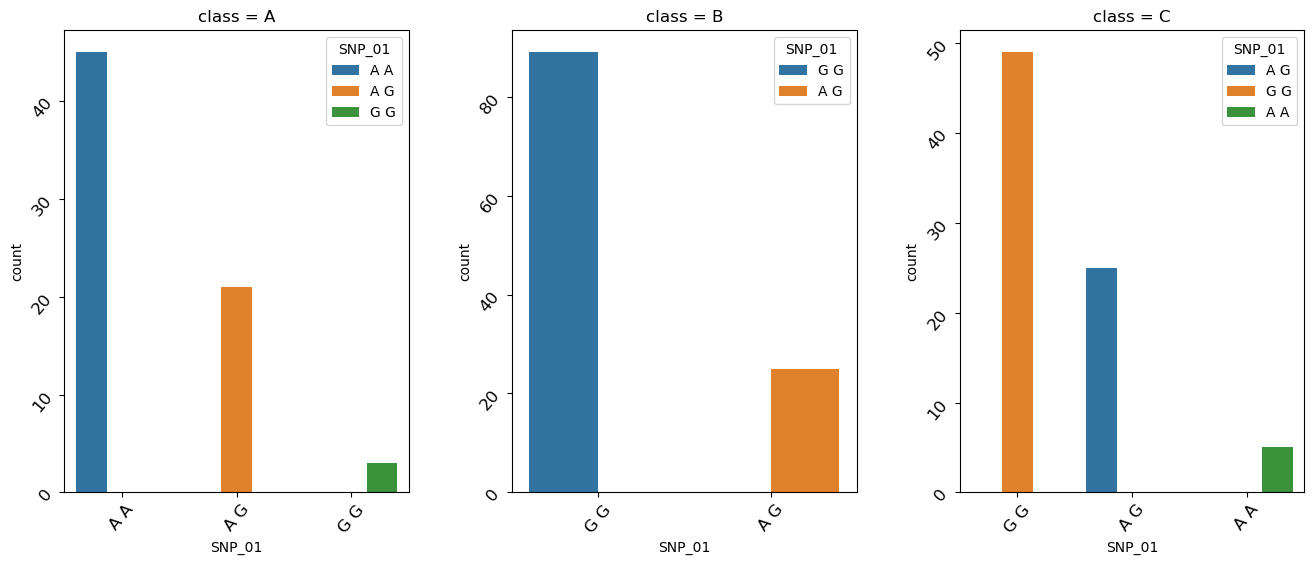

In [15]:
cat_plot("SNP_01")

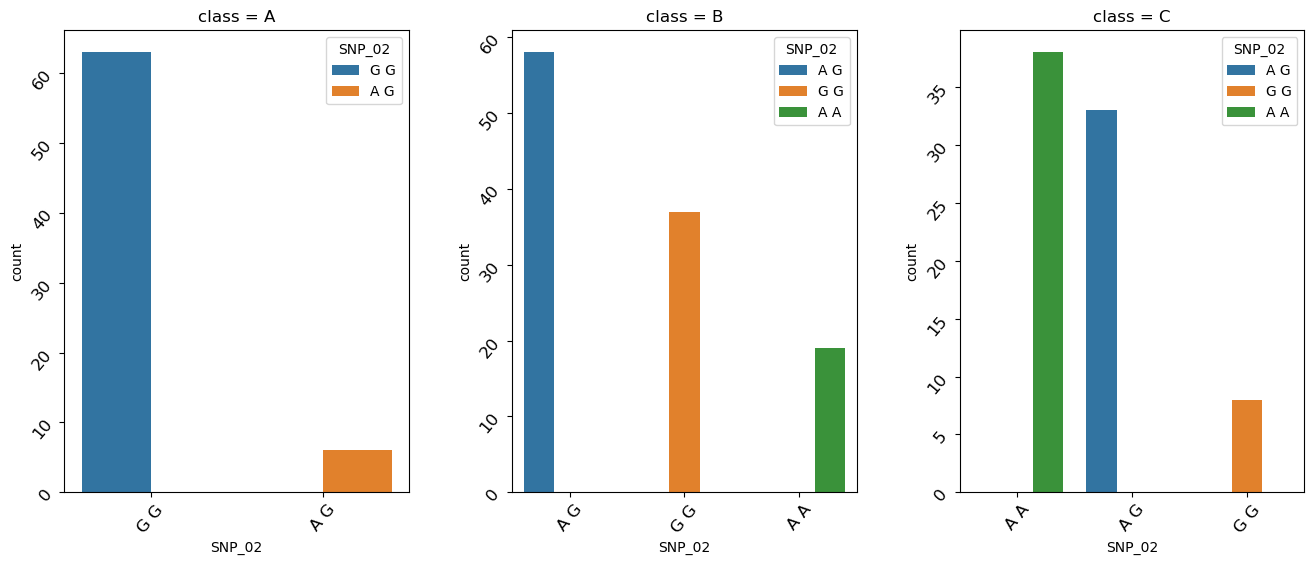

In [16]:
cat_plot("SNP_02")

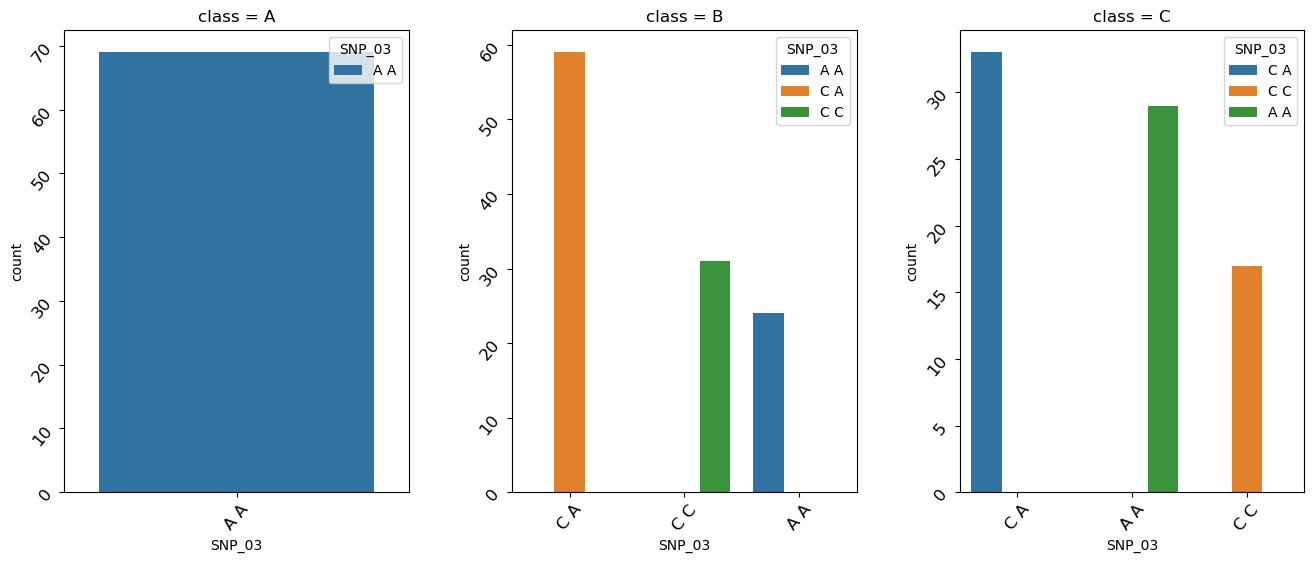

In [17]:
cat_plot("SNP_03")

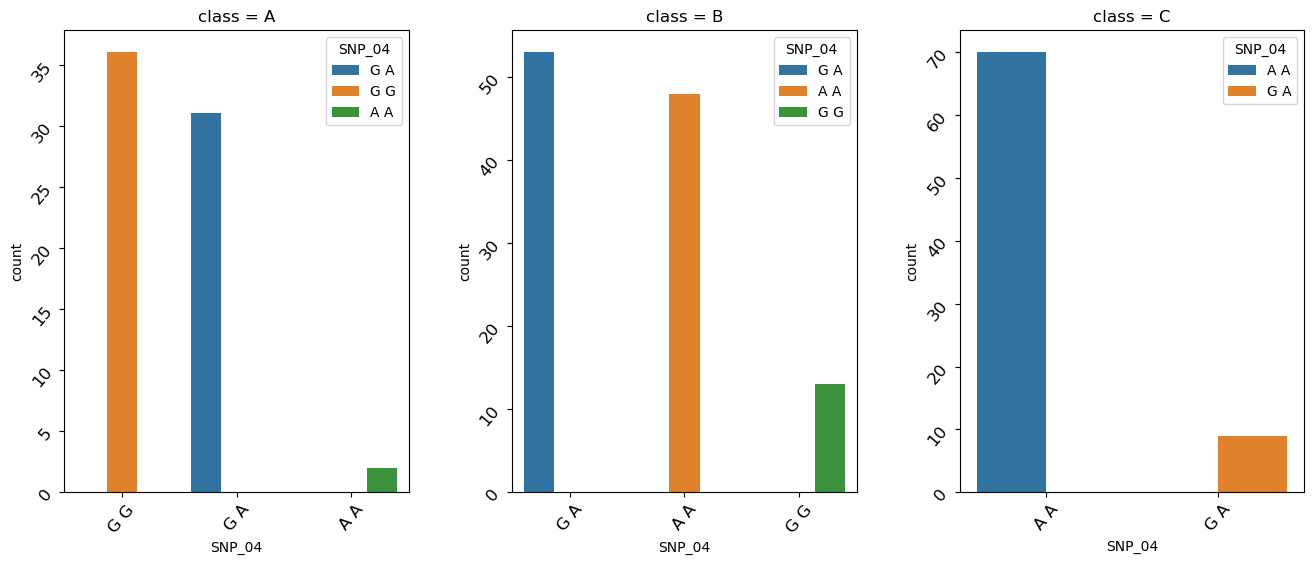

In [18]:
cat_plot("SNP_04")

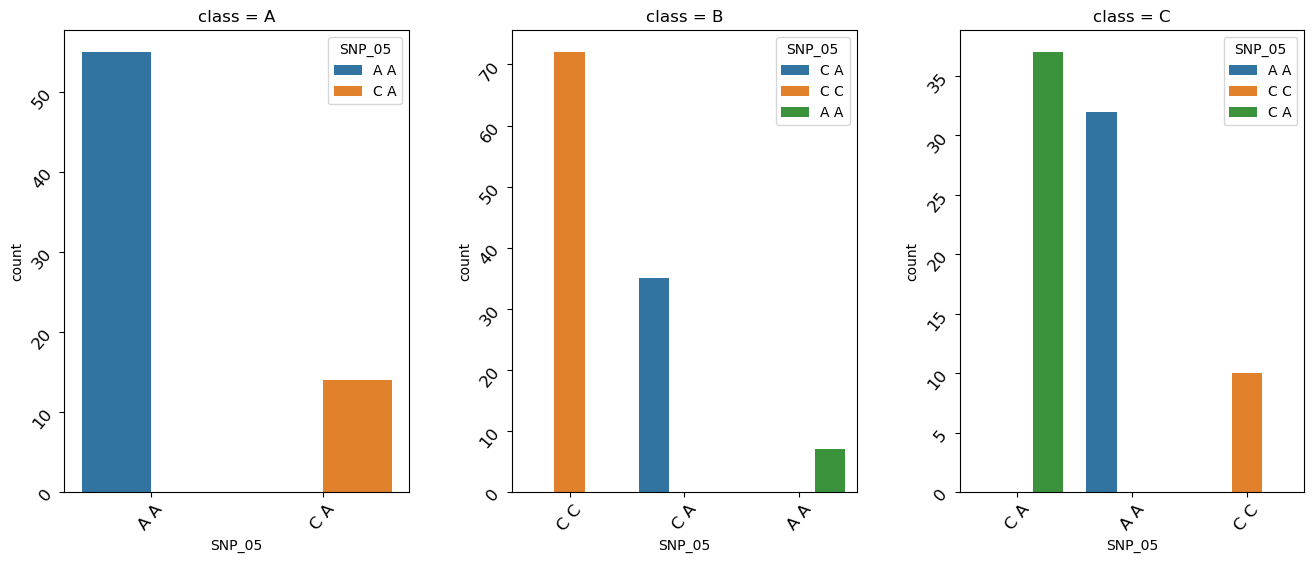

In [19]:
cat_plot("SNP_05")

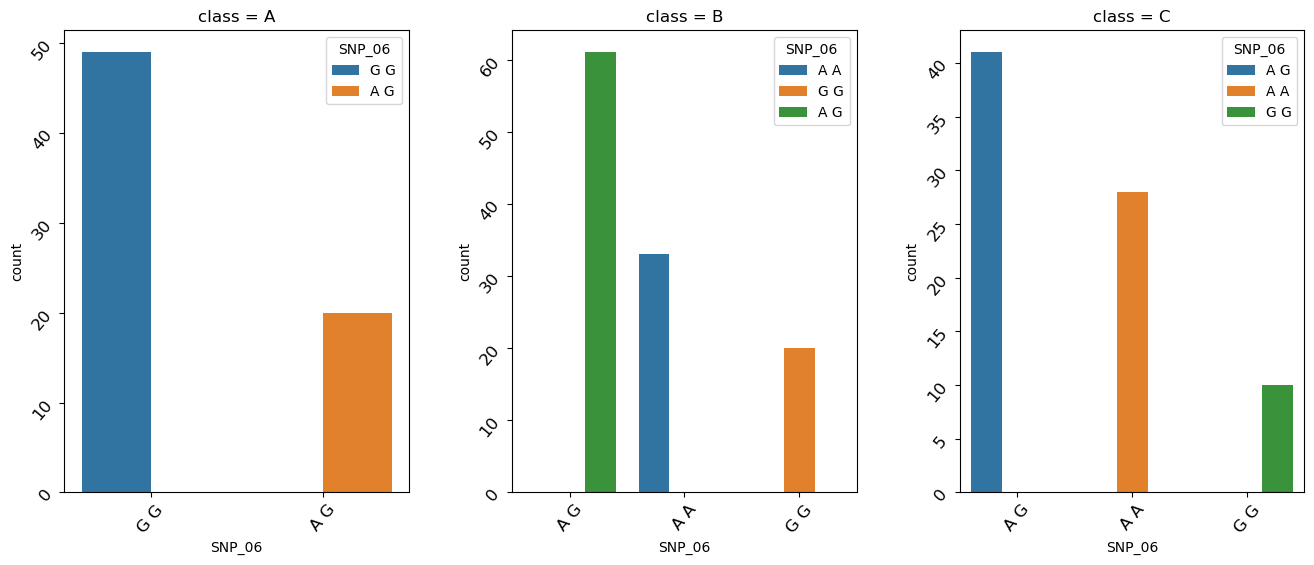

In [20]:
cat_plot("SNP_06")

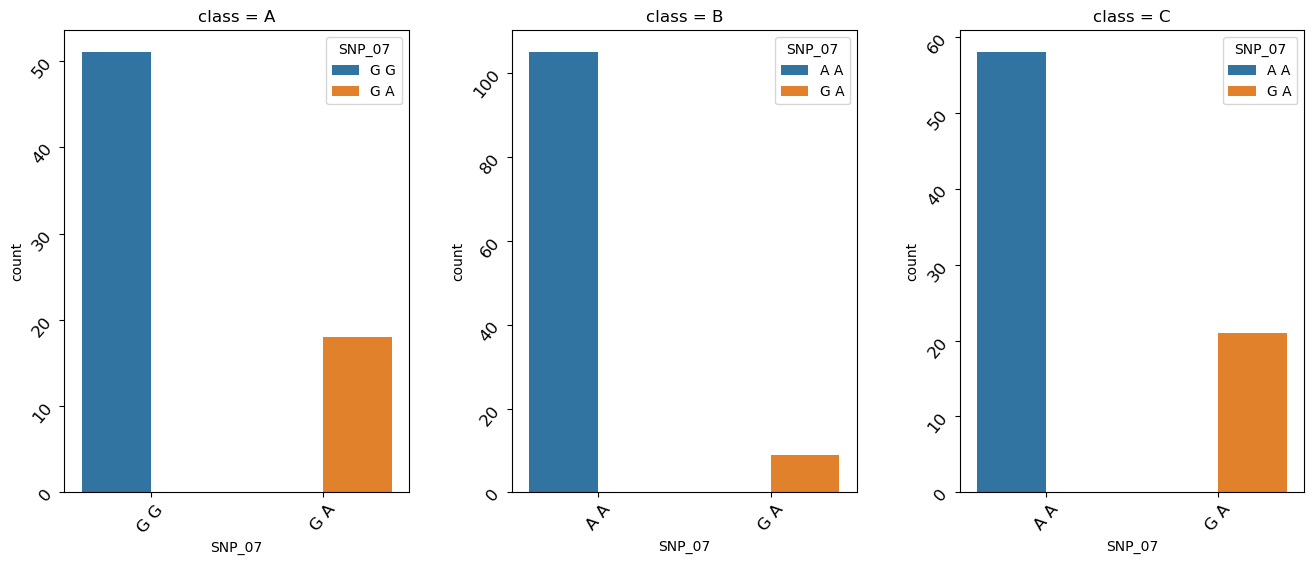

In [21]:
cat_plot("SNP_07")

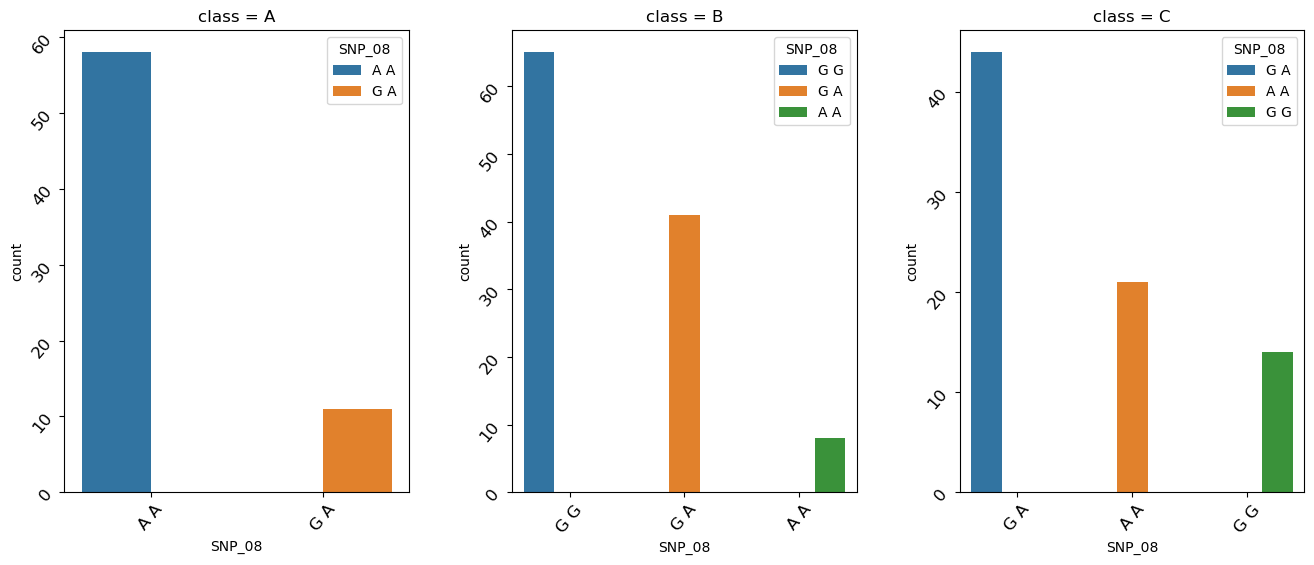

In [22]:
cat_plot("SNP_08")

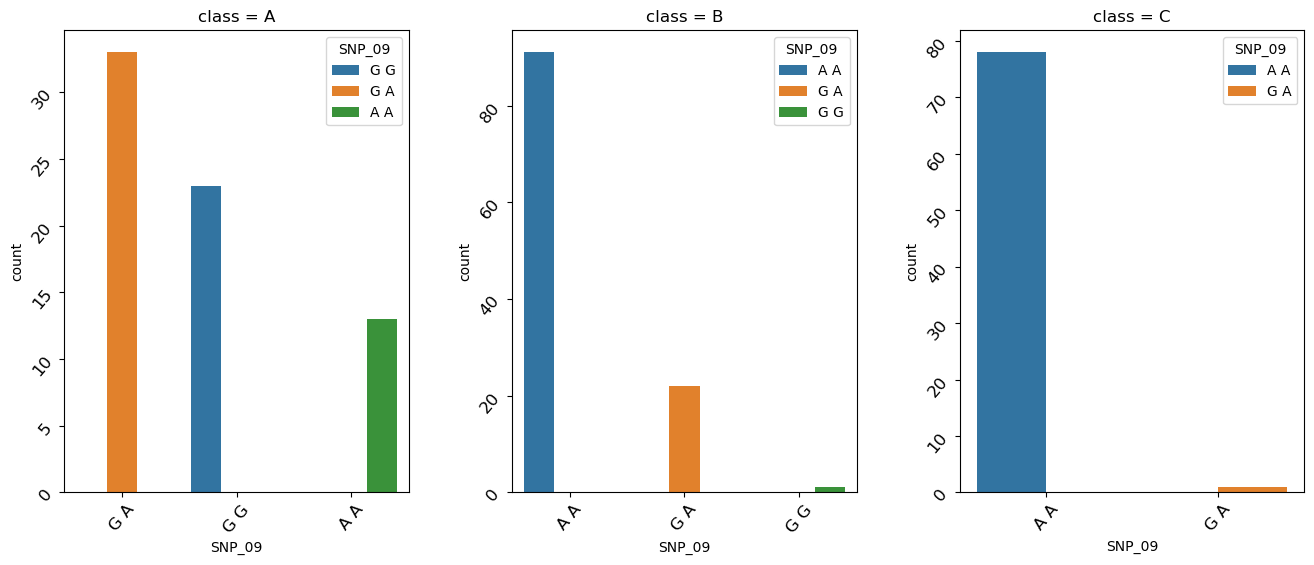

In [23]:
cat_plot("SNP_09")

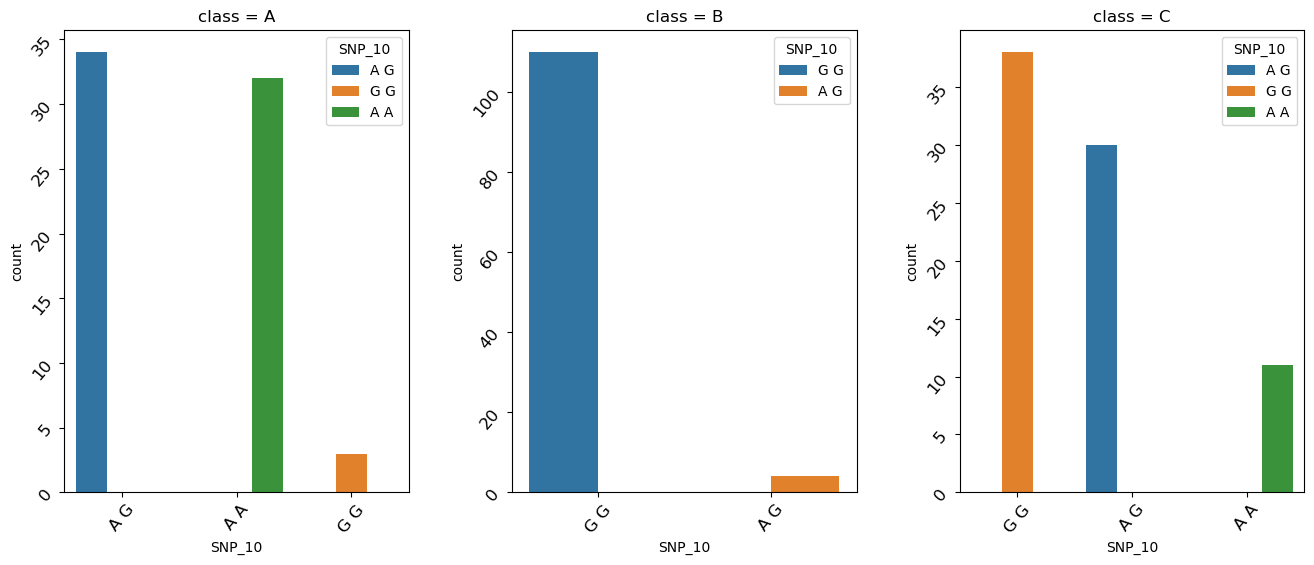

In [24]:
cat_plot("SNP_10")

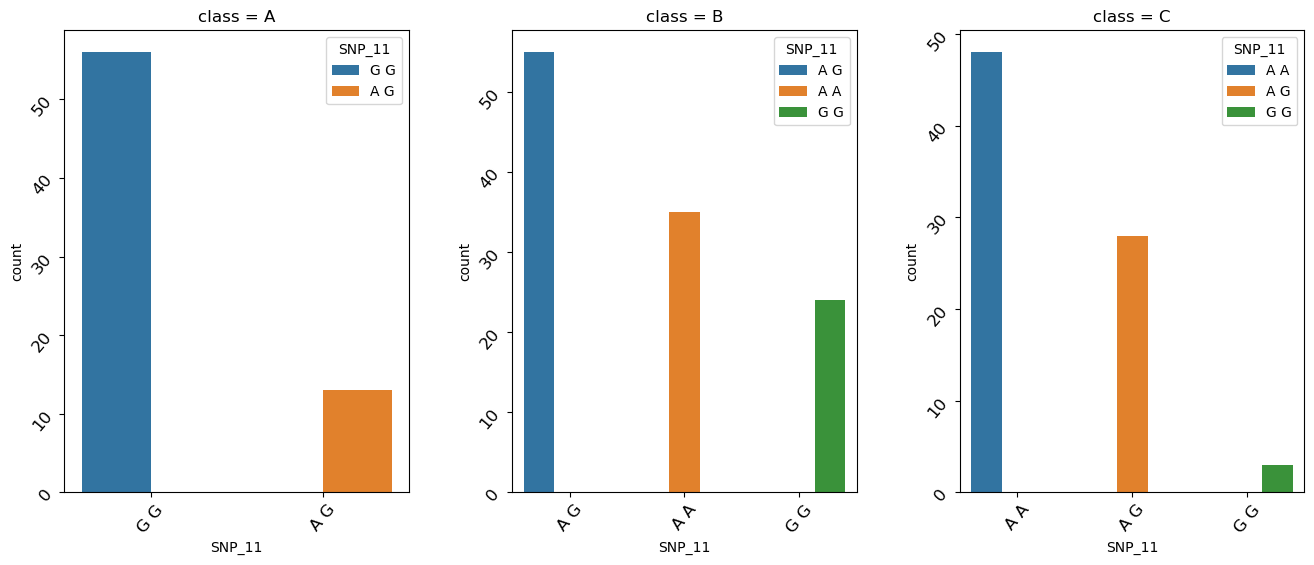

In [25]:
cat_plot("SNP_11")

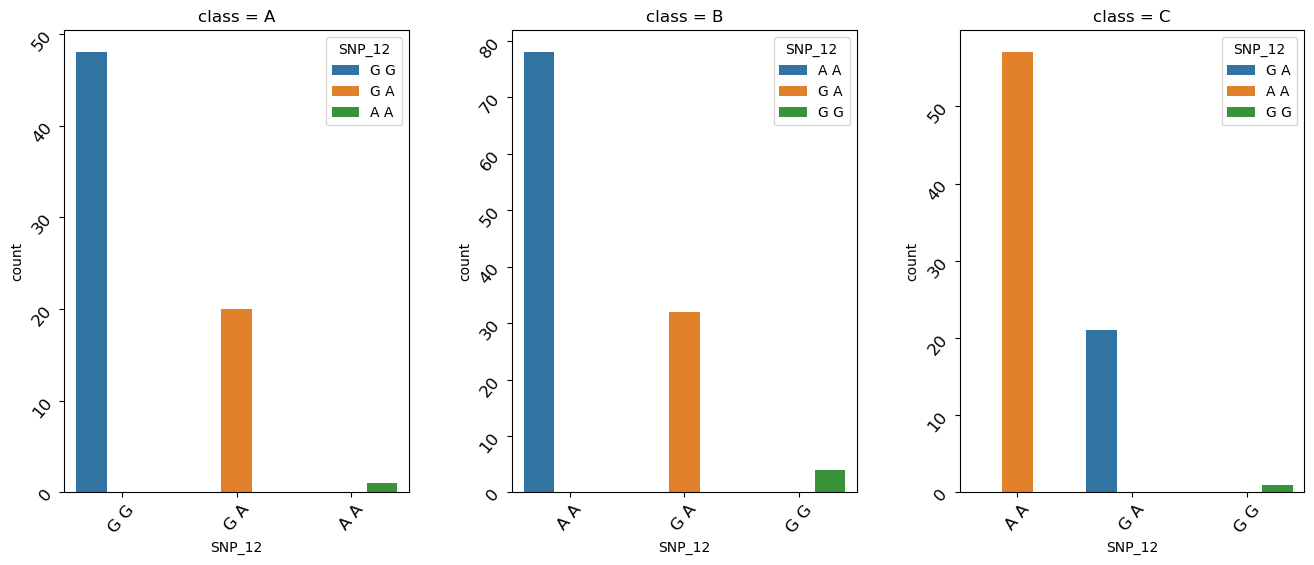

In [26]:
cat_plot("SNP_12")

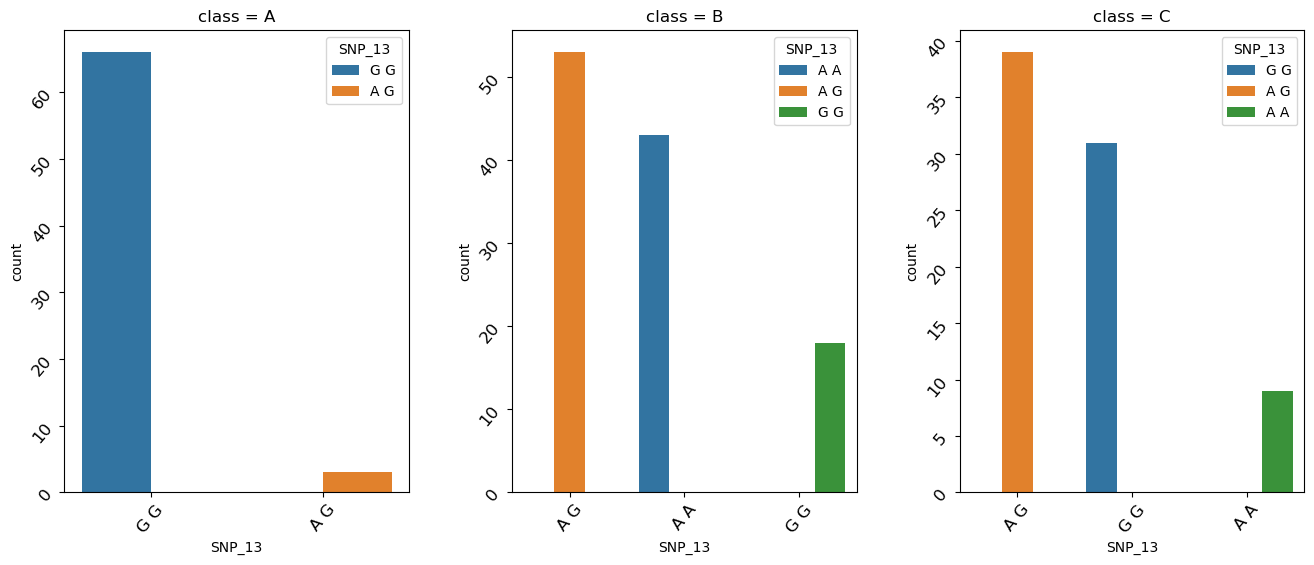

In [27]:
cat_plot("SNP_13")

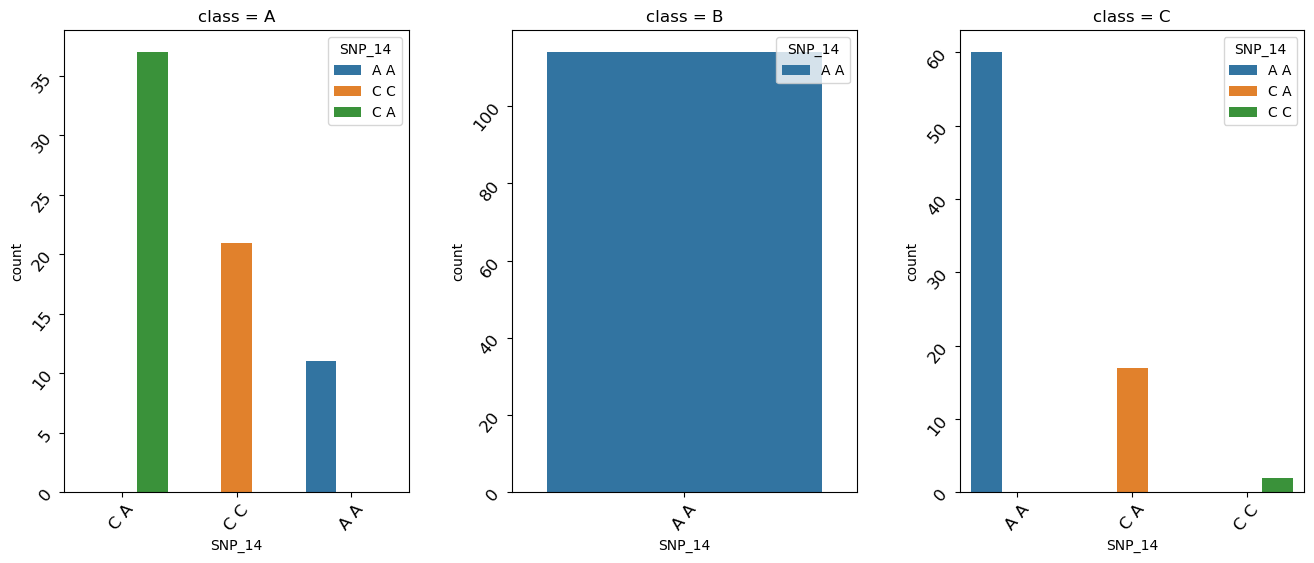

In [28]:
cat_plot("SNP_14")

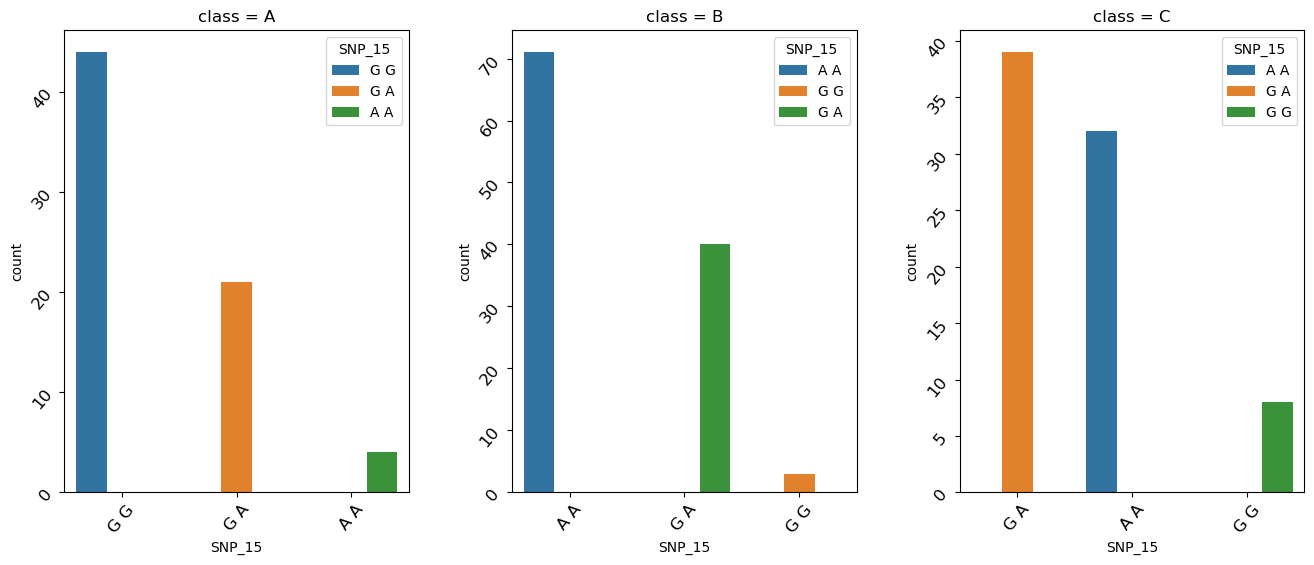

In [29]:
cat_plot("SNP_15")

In [39]:
train_df['id'] = train_df['id'].str.strip('TRAIN_')
print(train_df['id'])

0      000
1      001
2      002
3      003
4      004
      ... 
257    257
258    258
259    259
260    260
261    261
Name: id, Length: 262, dtype: object


In [40]:
train_df['id'] = train_df['id'].astype('float')
train_df.dtypes

id        float64
father      int64
mother      int64
gender      int64
trait       int64
SNP_01     object
SNP_02     object
SNP_03     object
SNP_04     object
SNP_05     object
SNP_06     object
SNP_07     object
SNP_08     object
SNP_09     object
SNP_10     object
SNP_11     object
SNP_12     object
SNP_13     object
SNP_14     object
SNP_15     object
class      object
dtype: object

Text(0.5, 1.0, 'trait & class Correlation')

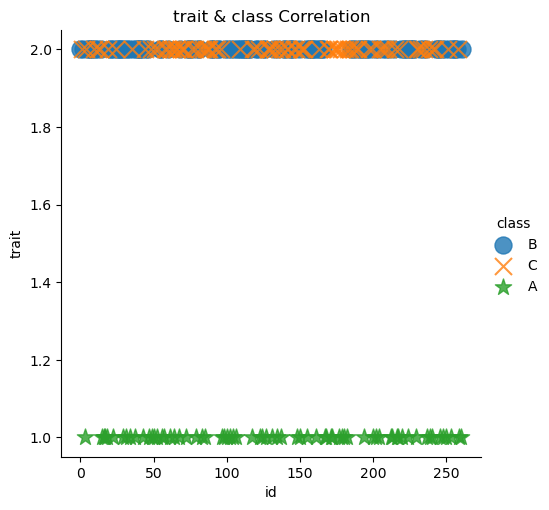

In [43]:
sns.lmplot(data = train_df, x = 'id', y = 'trait', scatter_kws = {'s':150}, markers = ['o','x','*'],
           hue = 'class', fit_reg = False)

plt.title('trait & class Correlation')

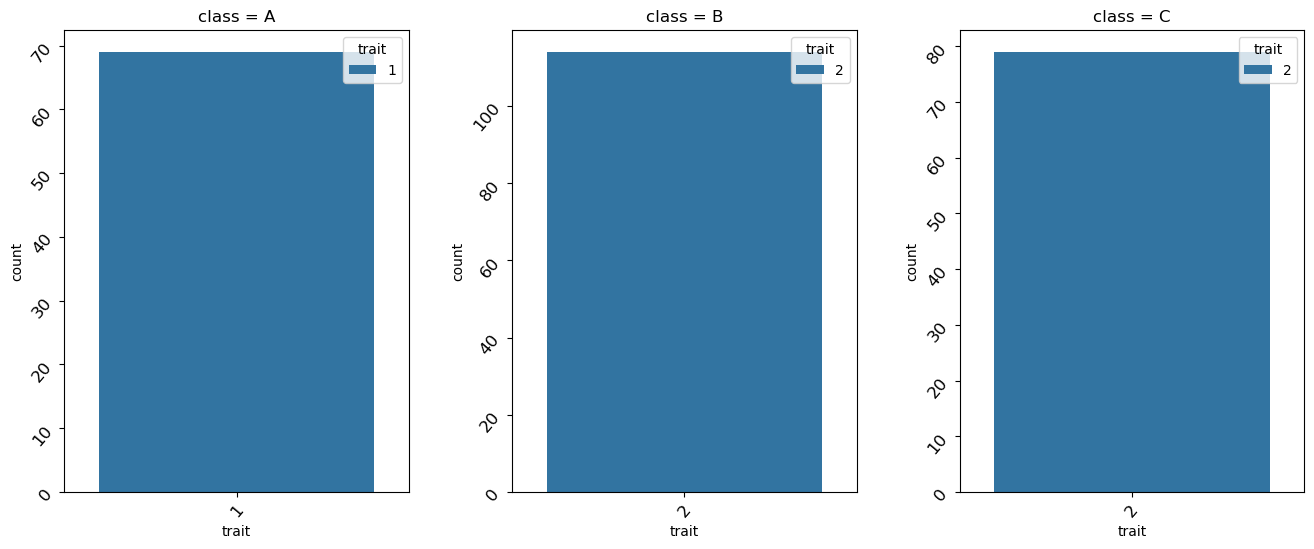

In [30]:
cat_plot("trait")

In [43]:
# 필요없는 식별자 제거

train_df.drop(['id','father','mother','gender'], axis=1, inplace = True)
train_df

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,2,G G,A G,A A,G A,C A,A A,A A,G G,A A,G G,A G,A A,A A,A A,A A,B
1,2,A G,A G,C A,A A,A A,A G,A A,G A,A A,A G,A A,G A,G G,A A,A A,C
2,2,G G,G G,A A,G A,C C,G G,A A,G A,G A,A G,A A,A A,A A,A A,A A,B
3,1,A A,G G,A A,G A,A A,G G,G G,A A,G G,A G,G G,G G,G G,A A,G G,A
4,2,G G,G G,C C,A A,C C,A A,A A,A A,A A,G G,A A,A A,A G,A A,G A,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,2,A G,A G,A A,G A,C C,A G,A A,G A,A A,G G,A G,G A,A A,A A,A A,B
258,2,G G,A A,C A,A A,A A,A G,G A,G A,A A,A G,A G,A A,A G,A A,G A,C
259,1,A G,G G,A A,G A,A A,A G,G G,G A,G A,A A,G G,G G,G G,C A,G G,A
260,1,A A,G G,A A,G A,A A,G G,G G,A A,G A,A G,A G,G A,G G,C A,G G,A


In [51]:
test_df.drop(['id','father','mother','gender'], axis=1, inplace = True)
test_df

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,1,A G,G G,A A,G A,A A,A G,G G,G A,G A,A G,A G,G A,G G,C A,G A
1,2,G G,A G,C C,G G,C C,A A,A A,A A,A A,G G,A G,A A,A A,A A,A A
2,2,G G,A G,A A,A A,C A,A G,A A,A A,A A,A G,A A,G A,G G,A A,G G
3,2,G G,A G,C A,A A,C C,A A,A A,A A,A A,G G,A A,G A,A G,A A,A A
4,1,A A,G G,A A,G G,A A,G G,G G,A A,G G,A G,G G,G A,G G,A A,G G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,2,A G,G G,C C,A A,C A,A G,A A,G G,A A,G G,G G,A A,A A,A A,G A
171,2,G G,A A,A A,A A,C A,A G,A A,A A,A A,A G,A A,A A,A G,A A,G A
172,2,G G,A A,A A,A A,C A,A G,A A,A A,A A,G G,A G,A A,A G,A A,G G
173,2,A G,G G,C A,G A,C C,G G,A A,G A,A A,G G,A G,A A,A A,A A,A A


## 라벨 - 인코딩

In [44]:
x_train =  train_df[['trait', 'SNP_01', 'SNP_02', 'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
                    'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15',]]
y_train = train_df[['class']]

In [53]:
x_test =  test_df[['trait', 'SNP_01', 'SNP_02', 'SNP_03', 'SNP_04', 'SNP_05', 'SNP_06', 'SNP_07', 'SNP_08', 'SNP_09',
                    'SNP_10', 'SNP_11', 'SNP_12', 'SNP_13', 'SNP_14', 'SNP_15',]]

In [47]:
class_le = preprocessing.LabelEncoder()
snp_le = preprocessing.LabelEncoder()
snp_col = [f'SNP_{str(x).zfill(2)}' for x in range(1,16)]

In [49]:
snp_data = []
for col in snp_col:
    snp_data += list(x_train[col].values)

In [50]:
y_train = class_le.fit_transform(y_train)
snp_le.fit(snp_data)

C:\ProgramData\Anaconda3\envs\tf_cpu\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [55]:
for col in x_train.columns:
    if col in snp_col:
        x_train[col] = snp_le.transform(x_train[col])
        x_test[col] = snp_le.transform(x_test[col])

C:\ProgramData\Anaconda3\envs\tf_cpu\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Model Fit

In [56]:
clf = tree.DecisionTreeClassifier(random_state = 42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [58]:
preds = clf.predict(x_test)
print('done')

done


In [59]:
preds

array([0, 1, 2, 1, 0, 1, 2, 2, 0, 0, 2, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1,
       2, 0, 1, 2, 1, 0, 0, 1, 0, 0, 1, 2, 0, 2, 2, 1, 1, 2, 0, 1, 2, 1,
       1, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 2, 0, 1, 2, 0, 1, 2, 2, 2, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       2, 0, 1, 1, 2, 1, 1, 2, 0, 1, 0, 2, 0, 1, 1, 2, 0, 0, 2, 1, 0, 1,
       2, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 1, 2, 2, 1, 2, 1, 0, 1, 0, 0,
       1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0, 1, 2, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 2, 1, 1, 0, 1, 2, 2, 1, 1])

In [60]:
submit = pd.read_csv('./sample_submission.csv')

In [61]:
submit['class'] = class_le.inverse_transform(preds)

In [62]:
submit.to_csv('./answer/Decisiontree_submit.csv', index=False)